In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Para regresión lineal hay distintas opciones:
from sklearn.linear_model import LinearRegression # sci-kit learn
import statsmodels.api as sm # stats models

# Introducción a la Inferencia Causal

_Bienvenides al maravilloso mundo del escepticismo causal._

Establecer relaciones causales es esencial no solamente para entender el mundo que nos rodea, sino también para actuar en él. Las decisiones de política, de negocios o científicas muchas veces giran en torno a preguntas causales: ¿cuál fue el impacto de alguna política  sobre el resultado que se buscaba? ¿Ofrecer un cupón de descuento hará que los clientes sigan comprando en nuestra plataforma? ¿Las vacunas disminuyen la probabilidad de hospitalización? Sin embargo, los modelos estadísticos en general y de Machine Learning en particular no estiman relaciones causales sino que predicen en base a correlaciones, y pueden ser engañosos a la hora de responder este tipo de preguntas. Por otro lado, la extracción de conclusiones causales a partir de correlaciones ha sido desde siempre parte esencial de nuestra forma de dotar de sentido al mundo que nos rodea, y por supuesto, siempre estuvo detrás del avance del conocimiento científico y técnico.

## Sobre qué es el curso

Este curso trata sobre cuándo y cómo es posible extraer conclusiones causales (como por ejemplo medir el impacto de una política o decisión comercial) a partir de los datos con los que contamos. Más específicamente, vamos a ver cómo _formalizar_ el proceso de inferencia causal, a partir de _hipótesis causales claras_ y cómo explotar al máximo esas hipótesis para responder lo mejor posible nuestras preguntas. En el camino introduciremos algunos enfoques que nos permiten entender _qué es_ la causalidad, y este proceso de formalizar nuestros razonamientos causales quizás algún día nos permita _enseñarle a razonar causalmente a una máquina_.

Si extraer conclusiones causales a partir de datos te suena difícil, vas por buen camino, pero este curso introductorio busca mostrarte que no es imposible. Si te suena fácil, _definitivamente_ tenés que hacer este curso, dado que probablemente no estés viendo la profundidad del problema al que nos enfrentamos.


## Qué te vas a llevar

* Entender la diferencia entre (a) predecir y (b) estimar un efecto causal.
* Saber formalizar tus hipótesis causales y determinar si es posible o no determinar un efecto causal según qué datos tengas. (Concepto de _identificación causal_)
* Conocer algunos de los principales métodos de estimación de efectos causales.
* Vas a saber aplicar distintos métodos, entendiendo cómo funcionan para poder decidir cuál usar en función de las particularidades de tus datos.
* Vas a conocer algunos ejemplos de aplicación en distintas áreas, y saber cómo realizar tu propio análisis de datos en Python, entendiendo las bases de cómo funcionan los métodos para poder interpretar la validez de los resultados.
* Dada alguna pregunta causal a responder, nuestro objetivo es darte herramientas para pensar si esa pregunta se puede responder y cómo hacerlo en distintos escenarios: si pudieras controlar el mundo, si pudieras experimentar, si puedieras conseguir cualquier dato observacional, y finalmente, en los casos más usuales, cuando contás con ciertos datos observacionales dados.

Además, esperamos que te lleves una nueva manera de interpretar los datos del mundo: una sana desconfianza respecto de las afirmaciones que se realizan en base a análisis estadísticos sin premisas causales claras.

## Algunos conceptos que utilizaremos en el curso

Vamos a usar varios conceptos de probabilidades y estadística. Acá hay algunas nociones que no vamos a tener tiempo de explicar, sino que vamos a dar por sabidas (con mayor o menor profundidad, eso dependerá de cada une):

* Distribuciones de probabilidad
* Probabilidad condicional
* Valores medios/esperanzas
* Varianza, desviación estándar
* Tests de hipótesis
* Regresión lineal

Si no te sentís muy seguro con alguno de estos conceptos, es probable que de todas formas puedas seguir y aprovechar el curso. Sin embargo en ese caso te invitamos a complementar el curso con [las clases de Probabilidad y Estadística del curso Matemáticas para IA de Humai](https://github.com/institutohumai/cursos-python/tree/master/MatematicasParaIA).

---
# Parte I: Qué es la causalidad y por qué importa

## I.i ¿Por qué importa?

Primero que nada, [sirve para ganar premios Nobel en Economía](https://www.nobelprize.org/prizes/economic-sciences/2021/press-release/). Si eso no te convence, tiene sentido, pero queremos que sepas que este tema está _extremadamente a la moda_. Igual tenemos mejores razones.

### Toma de decisiones


El aprendizaje automático en general se orienta a **problemas de predicción**: con algunas covariables dadas, queremos predecir el valor de una variable de resultado, nuestro principal objetivo es encontrar el famoso $\hat{Y}$ -las ventas el año próximo, si una imagen es perro o gato, etc.- de la mejor manera posible. Sin embargo, a la hora de tomar decisiones, muchas veces queremos responder a preguntas de otro tipo: ¿qué pasa con el resultado si implemento A versus si no implemento A, es decir, si cambia el valor de la variable "A"? Para responder ese tipo de **preguntas que comparan escenarios contrafácticos** -qué pasaría si tomo alguna decisión versus si no la tomo- aparece la inferencia causal. 


La inferencia causal se usa cada vez más en **empresas** como [Uber](https://www.uber.com/en-UY/blog/causal-inference-at-uber/) o [Microsoft](https://www.microsoft.com/en-us/research/group/causal-inference/), por ejemplo para responder si una campaña publicitaria via email contribuye a aumentar las ventas o si las recomendaciones de los algoritmos afectan de determinada manera las decisiones de compra. También se usa a la hora de decidir qué **políticas públicas** implementar o cómo mejorar su diseño. Gobiernos, universidades y organismos internacionales como el [Banco Mundial](https://www.worldbank.org/en/research/dime/research) llevan a cabo **evaluaciones de impacto** de distintas políticas para responder a preguntas como por ejemplo si otorgar subsidios al transporte mejora el acceso a oportunidades laborales o si un programa de tutorías mejora el rendimiento escolar de los estudiantes. 

Muchas de las estrategias de inferencia causal que veremos en el curso tienen su origen en la econometría, que viene a ser algo así como la "estadística de la economía". Las limitaciones a la hora de experimentar en las ciencias sociales han orientado gran parte de los esfuerzos a desarrollar estrategias teóricas y estadísticas que permitan hacer análisis del tipo causa-consecuencia y poder evaluar y asistir decisiones de política. 


### Inteligencia artificial

Alguien como Judea Pearl, el principal impulsor (y quizás _creador_, aunque eso sea discutible) del enfoque de grafos causales (ver Clase 2), no dudará en afirmar que la causalidad está en la base de nuestra capacidad de misma de razonar como seres humanos. De hecho, una de sus afirmaciones es que cuando razonamos sobre asociaciones entre distintos eventos, nuestra mente está preparada para identificar y recordar únicamente las asociaciones _causales_ entre variables, y que esto es lo que da lugar a muchas las famosas paradojas de la teoría de probabilidades, dependencias probabilísticas que son ciertas pero nos parecen raras o "espurias". Una de ellas es la Paradoja de Simpson, sobre la que hablaremos en esta clase, y otra es la Paradoja de Berkson, que hará su aparición en la clase próxima.

¿Por qué nuestras mentes estarían tan "cableadas" para pensar en relaciones causales por encima de las meramente correlacionales? Una buena razón sería que _las correlaciones que son causales son más estables en el tiempo y ante cambios en el entorno_. En palabras de Pearl, traducidas de su importante libro _Causality_,

> ... las relaciones causales son _ontológicas_, al describir vínculos físicos objetivos de nuestro mundo, mientras que las relaciones probabilísticas son _epistémicas_, reflejando lo que sabemos o creemos sobre el mundo.

Tiene sentido pues que la capacidad de _generalizar_ de un modelo de inteligencia artificial y la capacidad de _transferir_ el aprendizaje a una tarea nueva dependan de la capacidad del modelo de aislar los _mecanismos causales_ correctos (o más probables) a partir de los datos. Sin proponer que algunas correlaciones corresponden a mecanismos causales, mientras que otras no, es imposible saber qué correlaciones se mantendrían y cuáles serían destruidas al modificarse algún factor del entorno generador de los datos.

Actualmente hay muchísimo interés en las posibilidades de combinar o aumentar las capacidades de los modelos de Machine Learning con métodos de inferencia causal. Dejamos algunas referencias al final de la clase.

---
## I.ii ¿Qué es la causalidad?

Esta es una pregunta difícil que aqueja a los filósofos desde la Antigüedad. Así que mejor empecemos por lo que _no_ es...

<center>
<img src="imgs/xkcd_correlation.png" style="margin:auto" height=150/></center>

### Causalidad no es correlación

(Mejor dicho, _correlación no implica causalidad_.)

Si entramos a [este famoso sitio web](https://www.tylervigen.com/spurious-correlations) podremos disfrutar rápidamente de algunos gráficos muy cómicos, que parecen sugerir una relación fáctica entre variables realmente diferentes. Por ejemplo, este gráfico muestra simultáneamente la cantidad anual de personas que murieron ahogadas en una pileta en Estados Unidos versus la cantidad de películas estrenadas ese año en las que aparece Nicolas Cage:

<center><img src="imgs/spurious_correlations_nicholas_cage.png" height=350 style="margin:auto"/></center>

Estos ejemplos de _correlaciones espurias_ nos muestran que dos variables pueden aparecer asociadas, es decir que "se mueven conjuntamente", en este caso en el tiempo, incluso cuando lo más plausible es que no tengan absolutamente nada que ver (salvo quizá para _haters_ empedernidos de Nicolas Cage). Dicho sea de paso, también son un buen ejemplo de lo engañosos e incoherentes que pueden ser los gráficos con dos ejes verticales superpuestos (Las escalas, que hacen que 20 ahogamientos se correspondan con 2 películas, están elegidas para que visualmente parezca haber más correlación).

Pero ¿Qué es la correlación exactamente? Quizás algunes de ustedes conozcan el _Cuarteto de Anscombe_, o la más reciente y sorprendente [_Docena del Datasaurio_](https://www.autodesk.com/research/publications/same-stats-different-graphs), creada por Matejka y Fitzmaurice:

<center>
<img src="imgs/anscombe.png" style="margin:auto" height=200/>
<img src="imgs/datasaur.gif" style="margin:auto" height=200/>
</center>

Estos conjuntos de datos sintéticos tienen la peculiaridad de tener los mismos valores de los principales estadísticos sumarios: promedios, desviaciones estándar y el _coeficiente de correlación de Pearson_, muchas veces mal llamado meramente "correlación".

Estos ejemplos se usan típicamente para enfatizar la importancia de visualizar nuestros datos antes de realizar análisis. También pueden utilizarse para enfatizar que la correlación presente en los datos puede ser altamente _no lineal_, por lo cual una medida como la correlación de Pearson, que mide correlación _lineal_, puede resultar engañosa. Pero hay medidas de correlación más fidedignas en el caso no lineal (como por ejemplo, la _entropía relativa_, también llamada _divergencia de Kullback-Leibler_).

Detrás de todas estas nociones de correlación (o "asociación", como se dice a veces para distinguir de la correlación puramente lineal) hay un concepto fundamental, que es el de la **dependencia probabilística**. Dadas dos variables aleatorias $X, Y$, decimos que son **probabilísticamente independientes** si su distribución de probabilidad conjunta se factoriza como $p(X, Y) = p(X) p(Y)$. Equivalentemente, condicionar sobre una de las dos variables no afecta la distribución de valores de la otra:

$$ p(X | Y=y) = p(X) $$
$$ p(Y | X=x) = p(Y) $$

Vamos a usar una notación especial para esta situación de independencia entre $X$ e $Y$: 

$$\newcommand{\indep}{\perp \!\!\! \perp} X \indep Y$$

También usaremos fuertemente el concepto de **independencia condicional**: $X$ es independiente de $Y$ _dado_ $Z$ (escribimos $X \indep Y | Z$) si $p(X, Y | Z) = p(X | Z) p(Y | Z)$. Volveremos sobre esto en la Clase 2, pero por ahora es importante que **cuando hablamos de correlación, no nos referimos solamente a la correlación lineal** sino que **dos variables $X$, $Y$ están correlacionadas en alguna medida siempre que $p(X, Y) \neq p(X) p(Y)$**.

En el fondo, todo análisis de inferencia estadística asume que nuestros datos son muestras extraídas de una distribución de probabilidad conjunta $p(X_1, X_2, \dots)$ (donde las $X_i$ son nuestras variables o features de interés). Esta distribución de probabilidad viene a ser nuestro modelo del "mundo real", y nuestro objetivo será estimar, a través de los datos, ciertas características de esa distribución. Una de las cosas a llevarse de este curso es que **este panorama es incompleto, dado que ignora por completo la causalidad**. Para poder pasar de inferencia estadística a inferencia causal, es indispensable añadir una **nueva capa de modelización**, que **codifica explícitamente nuestras hipótesis sobre las relaciones causales entre las variables presentes**. Para quienes hayan oído hablar de _redes bayesianas_, esta es la diferencia entre una red bayesiana y una red causal (lo veremos en la Clase 2).

---
Dijimos que correlación no implica causalidad, pero por el contrario, **si veo correlación, es más probable que haya causalidad que si no observo nada**. De hecho el filósofo Hans Reichenbach formuló a mediados del Siglo XX el [_Principio de la Causa Común_](https://plato.stanford.edu/entries/physics-Rpcc/), que lleva su nombre, según el cual **dadas dos variables correlacionadas, o bien una es causa de la otra, o bien al revés, o bien ambas tienen una causa común**. Es decir que **la correlación es nuestra herramienta para detectar causalidad, y este curso se trata de cómo _identificar_ cuándo correlación _sí_ implica causalidad.**

Pero entonces ¿Qué podemos decir sobre lo que _sí_ es la causalidad?

### Los mundos contrafácticos

Una forma de entender la causalidad tiene que ver con entender preguntas del tipo "¿Qué habría pasado si...?", que son el ejemplo más paradigmático del **pensamiento contrafáctico**. Muchas veces se dice al pasar que no tiene sentido preguntarse por contrafácticos, dado que es imposible saber lo que habría pasado. En verdad, esto no es del todo correcto: es verdad que en la amplia mayoría de las situaciones no tenemos herramientas para saber con certeza qué habría pasado, pero cada vez que hacemos una afirmación causal del estilo "salí con paraguas porque estaba lloviendo", estamos afirmando que tenemos confianza sobre qué habríamos hecho si no hubiera estado lloviendo y todos los demás aspectos del mundo se hubieran mantenido constantes (en particular, confiamos en que _no_ habríamos salido con paraguas en tal caso).

Hoy en día, en filosofía se habla bastante de las [_teorías contrafácticas de la causalidad_](https://plato.stanford.edu/entries/causation-counterfactual/). Un filósofo diría que este curso no da una definición completamente rigurosa de _qué es_ la causalidad, y eso está muy bien, porque no somos filósofes ni nos interesa alcanzar ese grado de rigor conceptual. Sin embargo la noción de causalidad que vamos a manejar siempre estará relacionada con la idea de los mundos contrafácticos (y de hecho algunas de las cosas que veremos son relevantes a la discusión filosófica contemporánea).

---
Para terminar esta primera parte de la clase, consideremos una de esas famosas "paradojas probabilísticas": la Paradoja de Simpson. Este ejemplo es tan bueno que es casi infaltable en un curso sobre causalidad.

## Paradoja de Simpson

Vamos a tomar un ejemplo clásico: [un cierto estudio médico](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1339981/) de 1986 en el que se evalúan distintos tratamientos para la eliminación de cálculos renales. Se puede ver allí esta tabla que compara los porcentajes de éxito de dos tratamientos, A y B, al ser aplicados sobre dos tipos de pacientes: aquellos con cálculos renales más bien pequeños y aquellos con cálculos más bien grandes.

<center><img src="imgs/simpson_calculos_renales.png" style="margin:auto" height=150/></center>

Vemos que el tratamiento A parece preferible al B tanto para el caso de cálculos pequeños como cálculos grandes. Sin embargo, la última fila nos muestra que al considerar a todos los pacientes juntos, sin distinguir por la naturaleza de su problema, ¡El tratamiento B para ser preferible sobre el A!

¿Qué está pasando?

En primer lugar, podemos convencernos de que **matemáticamente no hay nada incorrecto**. Uno puede hacer las cuentas y convencerse de que están bien, no hay nada inconsistente.

Ante esto, **uno podría "rendirse" y declarar que las probabilidades son intrínseca e inevitablemente contraintuitivas**. Pero no podemos quedarnos tranquilos con esto. ¿Cuál es el mejor tratamiento? No puede depender de cómo hacemos la cuenta. Esto es grave porque, a priori, desagregar nuestros datos de cualquier otra forma (como por ejemplo por género) podría nuevamente dar vuelta la conclusión. No habría forma de sacar conclusiones de nuestros datos.

Lo que resuelve la aparente paradoja es que si bien la naturaleza de la correlación cambia una y otra vez, **lo que estamos buscando no es correlación, sino causalidad**. Y lo que determina cuál es el análisis correcto es cuál es nuestra hipótesis causal.

Notemos que la mayoría de las personas que recibieron el tratamiento A tenían cálculos renales grandes (lo cual en sí es una condición de salud menos favorable) mientras que la mayoría de las personas que recibieron el tratamiento B tenían cálculos renales pequeños. ¿Cómo podemos interpretar esto?

**Opción 1**: la asignación de un tratamiento u otro causa el tamaño de los cálculos. Esto podría pasar por ejemplo si el tratamiento A es escaso: las personas tardarían más en acceder a él y por lo tanto cuando son tratadas sus cálculos renales serían más grandes. Diagramáticamente tendríamos lo siguiente:

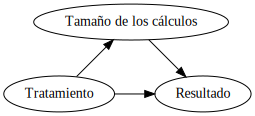

In [ ]:
#@title {display-mode: "form"}
from graphviz import Digraph
from IPython.display import display

#Especificamos engine='neato' para poder usar argumento `pos` en nodos
dot = Digraph(engine='neato')
dot.node('T', 'Tratamiento', pos='1,1!')
dot.node('Y', 'Resultado', pos='3,1!')
dot.node('X', 'Tamaño de los cálculos', pos='2,2!')
dot.edges(['TY', 'XY', 'TX'])
dot


En este diagrama, que matemáticamente es un _grafo_, las relaciones causales se muestran como flechas. En la Clase 2 veremos con más detalle esta forma de representar relaciones causales mediante grafos. Por ahora lo usamos intuitivamente.

Si este es el caso, entonces _asignar el tratamiento A a un paciente tiene un efecto negativo_, pues efectivamente retrasa el tiempo hasta que el paciente puede acceder a algún tratamiento. Lo que nos muestran los datos entonces es que el tratamiento A es mejor que el B una vez que son administrados, pero en definitiva termina siendo _peor_ que el B porque justamente genera retraso en el acceso a tratamiento por parte de los pacientes. **En este caso es preferible el tratamiento B**.

**Opción 2**: cuando un paciente tiene un problema más severo (cálculos más grandes), se decide aplicarle el tratamiento A con mayor frecuencia que el tratamiento B. En este caso, el tamaño de los cálculos causa la asignación de tratamiento:

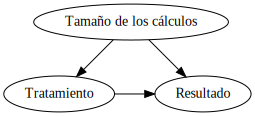

In [ ]:
#@title {display-mode: "form"}
from graphviz import Digraph
from IPython.display import display

#Especificamos engine='neato' para poder usar argumento `pos` en nodos
dot = Digraph(engine='neato')
dot.node('T', 'Tratamiento', pos='1,1!')
dot.node('Y', 'Resultado', pos='3,1!')
dot.node('X', 'Tamaño de los cálculos', pos='2,2!')
dot.edges(['TY', 'XY', 'XT'])
dot


Si esto es así, entonces al analizar los porcentajes de éxito agregados estaríamos siendo injustos con el tratamiento A: ¡le va peor porque le tocan los peores casos! Para eliminar este efecto "injusto", lo que tenemos que hacer es comparar los resultados entre tratamientos _a severidad constante_. Y al hacerlo vemos que el tratamiento A es mejor en todos los casos. Por lo tanto **en este caso es preferible el tratamiento A**.

**Otro ejemplo**: en el gráfico de abajo (empleado por Judea Pearl en algunas de sus charlas divulgativas) podemos ver cómo se ve este fenómeno para cantidades _continuas_.

<center><img src="imgs/simpson_cholesterol_age.png" style="margin:auto"/></center>

**Ejercicio de lectura activa**: ¿Podemos interpretar estos datos de dos maneras diferentes, al igual que en el ejemplo anterior? ¿Hay alguna que podamos descartar a priori?

In [ ]:
# Mi respuesta aquí

print("")

----

A continuación vamos a considerar varias situaciones que se parecen un poco a estas, pero lo vamos a hacer con un montón de conceptos y herramientas de análisis mucho más sutiles, a tal punto que quizás para el final de la clase ya no no les parezca que haya algo "paradójico" en absoluto.

---

# Parte II: Marco conceptual: resultados potenciales (o _potential outcomes_)

Este marco trata de responder a la pregunta de si "A" causa "B" a partir de un contrafáctico: comparar "B dado A" con "B dado no A". La pregunta usual que uno se suele hacer.

Vamos a introducir algunos conceptos que son parte del modelo causal de Neyman-Rubin. 


### Recordando esperanzas condicionales

Para entender causalidad, es **clave** entender el concepto de probabilidad condicional y esperanza condicional.

* La probabilidad condicional $P(Y|X)$ es la probabilidad del evento Y **dado** que sabemos que sucedió el evento X

* La esperanza condicional es la esperanza de los valores de Y cuando X toma determinado valor.  Un estimador de las esperanza condicional es el famoso "promedio por grupos". Tomar el promedio de Y para un grupo definido según X. Por ejemplo, el peso promedio según la edad. *Ejemplo sencillo.* Supongamos esta población de 4 personas cuyas iniciales son A, B, C y D, para las que conocemos su edad y su peso. Definimos la variable X = edad, Y = peso. Veamos cómo es la esperanza condicional:

<center><img src="imgs/esperanza_condicional.png" style="margin:auto"/></center>


### Empecemos

Supongamos que tuvimos una herida grave, y estamos pensando si ir o no al hospital. Queremos saber **si una visita al hospital tendrá un efecto positivo sobre nuestra salud.** 

<center>IR AL HOSPITAL $\rightarrow$ SALUD LUEGO DE IR AL HOSPITAL
</center>

Lo que nos estamos preguntando es: **¿lo que sucede si voy al hospital será mejor a lo que sucede si no voy al hospital?** Queremos comparar el **resultado potencial** de ir al hospital, contra el resultado potencial de no ir. Pero atención, para comparar entre dos resultados, debemos poder observarlos.

_Algo de notación._ Tenemos una **variable aleatoria** de resultado que llamaremos $Y_i$, un indicador de salud luego de ir al hospital. Este resultado puede variar en función de si vamos o no vamos al hospital, es decir, en función del **tratamiento**, que llamaremos $T_i$:

* Tratamiento del individuo $i$     
<center>
\begin{equation}
    T_i=
    \begin{cases}
      1 & \text{si fue al hospital} \\
      0 & \text{si no fue al hospital}
    \end{cases}
  \end{equation}
</center>

* Resultado observado para el individuo $i$    
<center> 
$ Y_i= \text{indicador de mala salud} $
</center>

* Resultados potenciales para el individuo i 
<center>
\begin{equation}
   Y_i(T_i) =
    \begin{cases}
      Y_i(T_i = 1) = Y_i(1) & \text{resultado potencial de ir al hospital} \\
      Y_i(T_i = 0) = Y_i(0) & \text{resultado potencial de no ir al hospital}
    \end{cases}
  \end{equation}
</center>
<br />


*Idealmente*. Por suerte somos Marty McFly y tenemos el DeLorean. Esto nos permite *observar ambos resultados potenciales*, el de ir y el de no ir al hospital:
1. Implementamos el tratamiento, vamos al hospital. Observamos nuestra salud luego de haber ido al hospital. **Resultado observado** para Marty: $Y_{Marty}(T_{Marty} = 1)$, es decir, su salud dado que fue al hospital.
1. Con el DeLorean volvemos al pasado, a las **exactas mismas circunstancias**. Esta vez no implementamos el tratamiento, NO vamos al hospital. Observamos nuestra salud luego de no haber ido al hospital. **Resultado observado** para Marty: $Y_{Marty}(T_{Marty} = 0)$, es decir, su salud dado que NO fue al hospital.


Reiteramos: debemos mantener constante (*ceteris paribus*) todo el resto de las circunstancias. Necesitamos una dimensión paralela, donde lo único que cambia es el hecho de ir o no ir al hospital. Si, por ejemplo, cuando volvemos el tiempo atrás además nos ponemos alcohol en la herida, y luego observamos otro resultado, no podemos asegurarnos de que haya sido el hecho de ir al hospital y no el alcohol el responsable del resultado que observamos.

Genial, resultados que observamos, resultados que podemos comparar. Como tenemos el DeLorean, podemos **observar y comparar ambos resultados potenciales**. El efecto individual de tratamiento (**ITE**, por _individual treatment effect_) para Marty será la diferencia en el resultado de salud cuando Marty va al hospital y el resultado de salud cuando Marty no va al hospital:


\begin{equation}
 ITE_{Marty} =  \underbrace{Y_{Marty}(T_{Marty} = 1)}_{\substack{\text{ Resultado observado} \\ \text{dado que fue al hospital}}}
- \underbrace{Y_{Marty}(T_{Marty} = 0)}_{\substack{\text{ Resultado observado} \\ \text{dado que NO fue al hospital}}} = Y(1) - Y(0)
\end{equation}


<center><img src="imgs/Marty.jpg" style="margin:auto"/></center>

Si otras personas tienen acceso al DeLorean, podemos observar realizaciones de las variables aleatorias $Y$, $T$ y el $ITE$ para ellas. Vemos qué pasa con su salud cuando van y cuando no val al hospital. 

Dado que hay aleatoriedad en el mundo, algunas heridas se salvan y otras no, seguramente nos interese algo así como la distribución del $ITE$, o algunos de sus momentos, como la media o la varianza. Si en promedio las heridas se salvan y no hay demasiada varianza, eso significa que es probable que me salve yo también (_¡esto es un test de diferencia de medias!_). En particular, a la media de los ITE la llamamos efecto medio de tratamiento (**ATE**, por _Average Treatment Effect_). 
$$\DeclareMathOperator{\E}{\mathbb{E}}$$ 
\begin{equation}
 ATE = \E[ITE] 
\end{equation}

</br>

------
_RESUMIENDO._

_Genéricamente, **pensamos la causalidad como una comparación de resultados potenciales**, contrafácticos, dimensiones paralelas. **En la práctica, necesitamos observar los resultados para compararlos.** Si pudiéramos acceder a una dimensión paralela, podríamos observar ambos resultados potenciales. Llamamos “tratamiento” a la causa cuyo efecto queremos evaluar. Implemento el tratamiento, observamos el resultado de implementar el tratamiento. Usamos el DeLorean para volver el tiempo atrás, a las exactas mismas circunstancias (¡ceteris paribus!) y no implementar el tratamiento. Observamos el resultado potencial de no haber implementado el tratamiento, con todo lo demás absolutamente igual. Y luego comparamos los resultados potenciales._

------
</br>

**Pero se rompió el DeLorean :(**

Se rompió el DeLorean $\equiv$ **problema fundamental de la inferencia causal**. 

El contrafáctico es por definición inobservable. Sólo un resultado potencial se realiza. O vamos al hospital ($T_i = 1$), o no vamos ($T_i = 0$). Para una misma persona, bajo las exactas mismas circunstancias, sólo tendremos o bien el resultado observado de ir al hospital $Y_i (Tt_i =1)$, o el resultado observado de no haber ido $Y_i (T_i =0)$. ¡Y sólo podemos comparar observables! Será imposible comparar resultados potenciales para los mismos individuos bajo las mismas circunstancias. **Hay un resultado potencial que no observamos**. Y por lo tanto, **no podremos acceder al ITE**, pues no podremos calcular a la vez, para el mismo individuo $i$, $Y_i (T_i = 1)$ e $Y_i (T_i = 0)$ para restarlos. En consecuencia, **tampoco podemos calcular el ATE**. ¡Nos faltan datos!



**Ejercicio de lectura activa**: ¿Qué significa que nos falten datos? ¿Por qué decimos que no podemos calcular el ATE?

In [ ]:
# Mi respuesta aquí.

print("")




Sin DeLorean, supongamos ambos fueron heridos pero que cada uno hace algo distinto. Marty va al hospital y el Doc no. Nuestros datos son algo así:

| i| $T_i$| $Y_i$ | $Y_i$ $($ $T_i$ $=$ $1$ $)$ |$Y_i$ $($ $T_i$ $=$ $0$ $)$| $ITE_i$|
| --- | --- | --- | --- | --- | --- |
| Marty | 1 (fue al hospital) | $Y_{Marty}$ | $Y_{Marty}$ | ????? | ????? |
| Doc| 0 (no fue al hospital) | $Y_{Doc}$ |  ????? | $Y_{Doc}$| ????? |


Nos faltan datos para calcular los ITE, y entonces tampoco podemos calcular el ATE, que promedia los ITE.

**¡¿Qué hacemos?!**

**Nuestro objetivo a lo largo del curso será construir un "buen" contrafáctico**, para poder acercarnos lo más posible al ATE. Observamos uno de los resultados potenciales, queremos aproximar "bien" el resultado que no observamos. Imputar "bien" el dato faltante. Como nunca lo podremos observar, vamos a tener que hacer supuestos. Entonces, ¿qué significará un "buen contrafáctico" o "aproximar bien"? Que los supuestos que usamos para hacerlo sean creíbles. 

La idea a lo largo del curso es ir entrenándonos en entender cuando un contrafáctico es "bueno o creíble" o es "malo" y puede llevarnos a confusiones. Por ejemplo, ¿podríamos usar al Doc, que no va al hospital, como contrafáctico de Marty, que sí fue?

**Ejercicio de lectura activa**. Argumente por qué Doc sería o no un buen contrafáctico para Marty.

In [ ]:
# Mi respuesta aquí.

print("")

**Respuesta**.

El Doc tiene más años que Marty, y más viajes en el tiempo. Es posible que la salud previa del Doc no sea exactamente igual a lo de Marty, o que las heridas que recibieron no sean exactamente las mismas. Entonces, no vamos a poder saber si las diferencias en la salud entre Doc y Marty luego de que Marty vaya al hospital y el Doc no vaya son sólo consecuencias de ir al hospital, o si estamos _confundiendo_ los efectos de ir al hospital con las consecuencias de esas otras características que tienen de diferente entre ellos. ¡No hay _ceteris paribus_!

### Vamos a los datos

"Vamos a los datos"  $\equiv$ vamos a los que sí podamos observar. La única alternativa sin Delorean.

Tenemos una muestra de N individuos. Para cada individuo en una circunstancia dada, observamos una realización de la variable aleatoria $Y_i$ (el estado de salud) y una realización de la variable $T_i$ (si fue o no fue al hospital). 

* Idealmente, querríamos ver el ATE. El ATE promediar para todos los individuos, las diferencias en los resultados cuando van y cuando no van al hospital. Pero como se rompió el DeLorean, jamás podremos observar al mismo individuo en las exactas mismas circunstancias.
* Debemos cambiar un poco nuestra pregunta, tratar de aproximarnos al ATE de otra manera. Si tenemos N individuos donde algunos fueron al hospital y otros no, **¿por qué no comparamos la salud promedio entre quienes fueron y quienes no fueron al hospital?** 






> _Los siguientes datos están tomados de Angrist y Pischke (2008)_ 

Los datos de la National Health Interview Survey (NHIS) de Estados Unidos tienen dos preguntas que podemos usar como muestras de nuestras variables de interés:
1. Durante los últimos 12 meses, ¿el encuestado pasó una noche en el hospital? $\rightarrow T_i$
2. ¿Diría que su salud es excelente, muy buena, buena, regular o mala? $\rightarrow Y_i$ (asignando 1 a "excelente" y 5 a "mala")

Comparemos los dos resultados **observados** con los que contamos. Calculemos la salud promedio para los que fueron al hospital, y para quienes no fueron, y calculemos la diferencia.

| $T_i$ (grupo) | $N$ (tamaño de muestra)|  $\widehat{E[Y_i |T=t]}$ (salud promedio del grupo) | Desvío est. |
| --- | --- | --- | --- |
| 1 (fue al hospital) | 7774 | 2.79 | 0.014 |
| 0 (no fue al hospital)| 90049 | 2.07|  0.003 |



$$\DeclareMathOperator{\E}{\mathbb{E}}$$ 
\begin{equation}
  \underbrace{\widehat\E[Y_i | T_i=1]}_{\substack{\text{ Salud (resultado observado) promedio} \\ \text{en los que fueron al hospital}}}  - \underbrace{\widehat\E[Y_i | T = 0]}_{\substack{\text{Salud (resultado observado) promedio} \\ \text{en los que  NO fueron al hospital}}}  = \quad 2.79 - 2.07 \quad = \quad \underbrace{0.72}_{\substack{\text{Diferencia promedio} \\ \text{en el indicador de mala salud}}}
\end{equation}


En promedio, la salud de los que fueron al hospital es ¡peor! (recordemos que es un indicador de *mala* salud) que la salud de los que no fueron al hospital... **Ejercicio de lectura activa**: ¿qué es lo que puede estar pasando? 


In [ ]:
# Mi respuesta aquí:

print('Lo que puede estar pasando es...')

Lo que puede estar pasando es...


**Respuesta.**

Probablemente, lo que sucede es que la condición de salud previa de las personas que pasan una noche en el hospital es peor que la de aquellos que no fueron. Es posible que haber ido al hospital haya mejorado el estado de salud de la persona, pero no lo suficiente como para que su estado de salud sea igual o mejor a aquellos que no tuvieron que ir al hospital porque estaban sanos.

Entonces, "ir al hospital" está reflejando no solamente la atención médica recibida en el hospital, sino también la condición de salud previa que hizo que esas personas fueran al hospital.

Gráficamente, sería algo así:

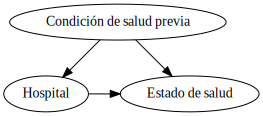

In [ ]:
#@title {display-mode: "form"} 
from graphviz import Digraph
from IPython.display import display

#Especificamos engine='neato' para poder usar argumento `pos` en nodos
dot = Digraph(engine='neato')
dot.node('T', 'Hospital', pos='1,1!')
dot.node('Y', 'Estado de salud', pos='3,1!')
dot.node('X', 'Condición de salud previa', pos='2,2!')
dot.edges(['TY', 'XY', 'XT'])
dot


Si se acuerdan, este es el mismo diagrama (grafo) que vimos antes en la Paradoja de Simpson... PARA PENSAR

### Confusores y sesgos 

* Decimos que la "condición de salud" previa es un **confusor**. 
  * Una variable que está correlacionada tanto con el tratamiento $T_i$ (ir al hospital) como con el resultado $Y_i$ (el estado de salud posterior)
  * Si no la tomamos en cuenta, confundimos el efecto que queremos medir, la visita al hospital (la atención médica y otros servicios recibidos allí) con el confusor
* Decimos que cuando comparamos la salud promedio observada entre quienes fueron al hospital y quienes no, además del **efecto causal** de la visita al hospital, tenemos un **sesgo de selección**: las personas que "se autoseleccionan" para ir a hospital son distintas de las que no van. 
* **No** estamos cumpliendo con la comparación **_ceteris paribus_**: las circunstancias de un grupo (condición mala de salud previa), no son iguales a las del otro (condiciones buenas de salud previa)

* Comparar al grupo de personas que va al hospital con el grupo de personas que no va no sirve para responder nuestra pregunta causal, contrafáctica: ¿una persona que sí fue, está mejor que si no hubiera ido? (es decir, nuestra pregunta por el ITE, o por el ATE)

* Entonces, el grupo de personas que no va al hospital **no es un buen contrafáctico** de las personas que sí van al hospital



_La diferencia de medias entre los resultados observados de grupos tratados y no tratados a veces se la llama "diferencia asociacional"_

* ATE: $\E[Y(1) - Y(0)] = \E[Y(1)] - \E[Y(0)]$ 
* Diferencia asociacional: $\E[(Y|T=1)] - \E[(Y|T=0)]$

**Ejercicio de lectura activa**. ¿En qué se diferencian el ATE y la diferencia asociacional?

In [ ]:
# Mi respuesta aquí

print('')

No son lo mismo porque .......


**Respuesta**.

En la diferencia asociacional "faltan observaciones": a diferencia del ATE, no promedia el resultado potencial Y(1) para todos los individuos -incluso los no tratados-, sino sólo para aquellos que efectivamente fueron al hospital, los tratados. Compara los resultados observados, no los resultados potenciales.

**Veamos formalmente cuál la relación entre la diferencia asociacional y el ATE:**

Podemos escribir el resultado observado en términos de resultados potenciales:
<center>
$Y_i = Y_i(0) + [Y_i(1) -Y_i(0)] T_i  \tag{1} $
</center>

El resultado observado es uno de los resultados potenciales, el que "se realiza" según el tratamiento $T_i$ que nos toque. Reemplazando por el tratamiento $T_i$ que nos toque en la ecuación de arriba:
<center>
\begin{equation}
    T_i 
    \begin{cases}
      T_i = 1 \rightarrow Y_i = Y_i(1) & \text{si voy al hospital, observo el resultado potencial de ir al hospital} \\
      T_i = 0 \rightarrow Y_i = Y_i(0) & \text{si no voy al hospital, observo el resultado potencial de no ir al hospital}
    \end{cases}
  \end{equation}
</center>

Reemplazando $Y_i$  por $(1)$ en la diferencia asociacional:
<center>
$$\DeclareMathOperator{\E}{\mathbb{E}}$$ 
\begin{equation}
  \underbrace{\E[Y_i | T_i=1] - \E[Y_i | T_i = 0]}_{\substack{\text{ Diferencia asociacional} }}  = \underbrace{\E[Y_i(1) | T_i=1] - \E[Y_i(0) | T_i = 1]}_{\substack{\text{TOT (diferencia resultados potenciales o ATE} \\ \text{ en los tratados)} }}  + \underbrace{\E[Y_i(0) | T_i=1] - \E[Y_i(0) | T_i = 0]}_{\substack{\text{SESGO DE SELECCION}}}
\end{equation}
</center>

Podemos descomponer la diferencia asociacional (observada) en dos componentes no observables:

* El **TOT**, por "Treatment on the Treated", que es el ATE (compara los resultados potenciales $Y_i(0)$ e $Y_i(1)$) pero solamente para el grupo de tratados (condiciona en $T_i=1$), en este caso para los que van al hospital. Son las diferencias en el resultado **atribuibles al tratamiento**. 
_Notas sobre el TOT: (a) definiendo el tratamiento inverso ($T_i=1$ como no ir al hospital) podríamos encontrar el ATE para el grupo quienes no van al hospital. Pero en general nos interesa el efecto del tratamiento para el grupo de que sean tratados. (b) Muchas veces se lo llama directamente ATE, pero debemos recordar que es el ATE para solamente los tratados_

* El **sesgo de selección** es la diferencia de los resultados potenciales de NO recibir tratamiento entre el grupo de tratados y el grupo de no tratados. Es decir, las diferencias que de todos modos existirían en el resultado de tratados y no tratados aún si no hubieran recibido el tratamiento. Por lo tanto, son las diferencias en el resultado que **no son atribuibles al tratamiento**. En nuestro ejemplo, son las diferencias que seguirían existiendo entre quienes fueron y quienes no fueron al hospital si ninguno hubiera ido al hospital.

Por lo tanto, al comparar las medias de quienes van al hospital y quienes no van, estamos confundiendo el efecto de ir al hospital con otras diferencias que hay entre quienes van y quienes no van. El objetivo, entonces, será eliminar el sesgo de selección para poder aproximar el efecto de tratamiento.




**Ejercicio de lectura activa**. ¿Cuál imaginan que es el sentido del sesgo de selección en nuestro ejemplo?

In [ ]:
# Mi respuesta aquí

print('Probablemente, el sesgo de selección sea...')

Probablemente, el sesgo de selección sea...


**Respuesta**.

Si la condición previa de salud de quienes fueron al hospital es mucho peor que la de quienes no fueron, ¡el índice de mala salud sin haber ido al hospital será mucho más alto para los que van! Hay un sesgo de selección positivo: los tratados tendrían un resultado $Y_i$ mas alto que los no tratados incluso si no hubieran ido al hospital.

Es posible que el efecto de tratamiento sea negativo, es decir, que ir al hospital mejore la salud de quienes van, pero que el sesgo de selección sea tan grande y positivo que la diferencia de medias resulta positiva. Es decir, ir al hospital mejora pero no compensa las diferencias de salud previas. Por ejemplo, la situación podría ser algo así:

<center>
$$\DeclareMathOperator{\E}{\mathbb{E}}$$ 
\begin{equation}
  \underbrace{0.72}_{\substack{\text{ Diferencia asociacional}\\ \text{ que observamos } }}  = \underbrace{-0.28}_{\substack{\text{TOT (diferencia resultados potenciales} \\ \text{ en los tratados)} }}  + \underbrace{1}_{\substack{\text{SESGO DE SELECCION}}}
\end{equation}
</center>

Esta es la hipótesis que suena más razonable... Pero tranquilamente alguien podría argumentar que no, que aún con diferencias previas entre los que van y los que no, ir al hospital empeora la salud de quienes van, y que hubieran estado mejor sin ir. Algo así como:

<center>
$$\DeclareMathOperator{\E}{\mathbb{E}}$$ 
\begin{equation}
  \underbrace{0.72}_{\substack{\text{ Diferencia asociacional}\\ \text{ que observamos } }}  = \underbrace{0.28}_{\substack{\text{TOT (diferencia resultados potenciales} \\ \text{ en los tratados)} }}  + \underbrace{0.5}_{\substack{\text{SESGO DE SELECCION}}}
\end{equation}
</center>

Entonces, queremos recuperar bien el ATE en los tratados, o lo que es lo mismo, eliminar el sesgo de selección, para saber si efectivamente ir al hospital mejora la salud de quienes lo hacen.

Eliminar el sesgo de selección implica hacer una comparación _ceteris paribus_, como si no hubiera diferencias entre los que van y no van al hospital, como si estuviéramos comparando a la misma persona que viajó al pasado y volvió al futuro. Y **las comparaciones que se establecen en condiciones *ceteris paribus* admiten una interpretación causal**, no tienen sesgo de selección.


## Alcance de la pregunta causal

Antes de seguir, notemos algunas cosas sobre el alcance de nuestra pregunta causal cuando usamos el marco de resultados potenciales. Nos preguntamos si determinado tratamiento genera determinado resultado. Esto es:
1. Queremos encontrar los efectos de ir al hospital sobre la mala salud, pero no todas las causas de la mala salud.
2. Vamos a comparar los efectos de ser tratado relativos a los de no ser tratado.
3. Para que tenga sentido la pregunta y podamos identificar un efecto causal, debe haber **exposición potencial**: todos los individuos deben poder estar potencialmente expuestos a todos los tratamientos, dejando el resto de las circunstancias constantes (sin perder la noción de _ceteris paribus_). Sólo así hay **resultados potenciales** para comparar. $→$  Para saber si es posible identificar un efecto causal, podemos preguntarnos si **existe un "experimento ideal"** que nos permita comparar esos efectos potenciales (como lo es usar el DeLorean). Las estrategias de identificación causal a lo largo del curso tratan de emular ese experimento ideal, de construir un buen contrafáctico. 



## Supuestos para aproximar bien el efecto de tratamiento

Vimos que APROXIMAR BIEN EL TOT == eliminar el sesgo de selección o los confusores == conseguir un **buen contrafáctico** del hecho de ir al hospital. Conseguir un **buen contrafáctico** es aproximar el resultado potencial si los que fueron al hospital no hubieran ido.

Como no podemos comparar al mismo individuo en dos mundos paralelos, la solución estadística es estimar el efecto causal observando a individuos distintos y comparando los promedios de esos grupos. Para que la comparación entre grupos identifique el efecto causal, deben cumplirse los siguientes supuestos:


El supuesto estrella es el **supuesto de independencia:**  Y(0), el resultado potencial de no haber recibido tratamiento, es independiente de ser o no tratado. Formalmente, esto significa que
$\E [Y_i(0) | T_i = 1] = [Y_i(0) | T_i = 0] = \E[Y_i(0)]  \rightarrow \text{Sesgo de seleccion} = 0$ .

Además, los siguientes supuestos:
* Exchangeability: el efecto estimado no depende de quiénes reciban el tratamiento (de sus otras características), podríamos intercambiar las personas tratadas con las no tratadas y el resultado no se ve afectado. 
* SUTVA (Stable Unit Treatment Value Assumption), que agrupa dos supuestos:
  * No interferencia: el outcome potencial de un individuo no puede verse afectado por el hecho de que otro individuo sea tratado, por ejemplo, no puede haber "efectos derrame" o "spillovers", como sucede con las vacunas. 
  * Homogeneidad en el tratamiento: todos los tratados reciben lo mismo, hay una sola versión de cada tratamiento, no hay variaciones ocultas en el tratamiento y está bien claro y definido qué significa ser tratado. 


Estamos comparando en condiciones _ceteris paribus_, lo único que distingue a los grupos es el hecho de haber recibido tratamiento, y tenemos un grupo de control es un _buen contrafáctico_ del grupo de tratamiento. Las estrategias que veremos a lo largo del curso se esfuerzan por construir ese contrafáctico creíble. También, la idea es entrenarnos en darnos cuenta cuándo es probable que alguno de estos supuestos no se esté cumpliendo y estemos identificando mal el efecto causal. 


**Ejercicio de lectura activa.** ¿Cómo podemos verificar que se cumple el supuesto de independencia?

In [ ]:
print("")

**Respuesta**. Nunca podremos _verificar_ que se cumple el supuesto de independencia (¡por eso es un supuesto!) porque para el grupo de tratados jamás podremos observar el efecto potencial de no haber sido tratado. Los argumentos respecto de si se cumple o no siempre serán teóricos, no empíricos. A grandes rasgos hay dos formas de tratar de que el supuesto de independencia se cumpla y creíblemente lograr comparar entre "grupos que hubieran sido idénticos" de no haber existido tratamiento. Esas dos grandes formas son: (1) asignación aleatoria del tratamiento, (2) controlar por los posibles confusores, es decir, las variables que son diferentes entre los grupos y pueden afectar el resultado.


#### (1) Experimentos
**Alto ahí.** ¿Por qué pensás que los experimentos son útiles para identificar relaciones causales?

In [ ]:
print("")


Una forma de conseguir que se cumpla el supuesto de independencia es **asignar aleatoriamente el tratamiento**. De esa manera, estar expuesto a tratamiento o control, es independiente de cualquier otra variable. En particular, el tratamiento no estará correlacionado con el resultado potencial de no haber sido tratado. O lo que es lo mismo, los tratados y los no tratados hubieran sido idénticos de no haber sido por el tratamiento.

Lo que podemos verificar al hacer un experimento es que el tratamiento no esté correlacionado con de las características pre-tratamiento. Por lo tanto, lo único que diferenciará a los tratados de los no tratados será el hecho de recibir el tratamiento. No habrá sesgo de selección. 

Si la población es lo suficientemente grande, en promedio las características del grupo de control y las características del grupo de tratamiento serán las mismas (hay "balanceo de características").

#### (2) Controlar por confusores

Otra opción es controlar por todas aquellas características que diferencian al grupo de tratados y no tratados, y que podrían estar correlacionadas con el resultado. Condicional en dichas características, el resultado potencial de no recibir tratamiento debería ser el mismo para ambos grupos. 


_Vamos con un ejemplo práctico para entender esto un poco mejor_


## Simulación

A continuación simularemos unos datos y estimaremos las relaciones entre ellos con el objetivo de identificar el efecto causal.


La siguiente simulación nos permitirá:


*   Ver el sesgo que se produce al omitir confusores o variables relevantes
*   Ver posibles caminos para identificar correctamente el efecto causal: experimentar o controlar por dichos confusores




### Ejemplo: _¿es fumar perjudicial para la salud?_

Supongamos que queremos ver el efecto del cigarrillo en la salud. 

Lo que nos permite la simulación es jugar a que conocemos el _verdadero_ proceso generador de datos, que se compone de las siguientes variables:



*   Variable dependiente (resultado): 
  * $salud_i$: indicador de salud entre 0 y 100, donde 100 es mejor salud
*   Covariables:
  * $edad_i$: se relaciona negativamente con la salud (empeora la salud al envejecer).
  * $cigarrillos_i$: cantidad de cigarrillos fumados por semana. Se relaciona negativamente con la salud (empeora la salud al fumar), pero en esta población los jóvenes fuman más.  
  * $fumar_i$: para mantenernos en el marco del tratamiento binario del que venimos hablando (tratados versus no tratados) usaremos esta variable en vez de usar $cigarrillos$. Pero tranquilamente podríamos usar la variable continua (¡pueden probarlo!). Vamos a decir que la persona es "tratada" (fuma mucho) si fuma más que la media.  Será la variable de interés, cuyo efecto causal sobre la salud queremos estimar.

Proceso generador de datos ("modelo verdadero"):
$$
salud_i = 100  - 10  \; fumar_i - edad_i +  u_i
$$


$$
cigarrillos_i = -  0.5  \; edad_i + \alpha_i
$$

$$
fumar_i = 1 ⇔ cigarrillos_i > E(cigarrillos_i)
$$


Con las siguientes distribuciones:

$$ u_i \sim \mathcal{N}(0,\,1)\ $$ 
$$ \alpha_i \sim exp(1) $$ 
$$ edad_i \sim \mathcal{N}(40,\,10)\  $$ 



En este ejemplo de juguete conocemos la verdad respecto del efecto de fumar en la salud. Vemos que la salud depende de los cigarrillos y de la edad, que para aquellos que fuman mucho cae un punto el índice de salud en promedio y que el índice de salud se reduce en 1 punto con cada año que pasa (para la próxima pensamos un ejemplo más feliz). Notar que $u_i$ es un error aleatorio. La relación entre las covariables y el resultado no es determinística, hay algo de aleatoriedad de persona a persona.

En esta simulación vamos a generar algunos datos, que es con lo que nos enfrentaremos en la realidad: tendremos unas cuantas mediciones del índice de salud, de la edad y de los cigarrillos consumidos para cada persona. Veremos si a partir de esos datos podemos recuperar el efecto causal de los cigarrillos sobre el índice de salud, que sabemos que es **-10**.



**Ejercicios**




**1. Supongamos que tenemos una población de 10000 individuos. Generar 10000 observaciones de las variables aleatorias edad, cigarrillos, fumar y salud.**

In [ ]:
np.random.seed(9)

N = 10000 # tamaño de nuestra población


# Vectores
edad = np.random.normal(40, 10, size = N)
cigarrillos = 50 -0.5 * edad + np.random.exponential(scale = 1, size = N)
fumar = np.array([1 if i > np.mean(cigarrillos) else 0 for i in cigarrillos])

salud = 100 - 10 * fumar  - edad + np.random.normal(size = N)


# Como DataFrame
data = pd.DataFrame(np.array([salud, edad, cigarrillos, fumar]).transpose())
data.columns = ['salud', 'edad', 'cigarrillos', 'fumar']

data.head()

,salud,edad,cigarrillos,fumar
0,50.288490,40.011086,32.240430,1.0
1,52.599040,37.104559,31.638577,1.0
2,62.490131,28.839337,38.861040,1.0
3,59.400392,39.871172,30.154300,0.0
4,53.769606,36.216385,32.780151,1.0


.**2. Graficar la distribución de cada variable y las correlaciones entre ellas**

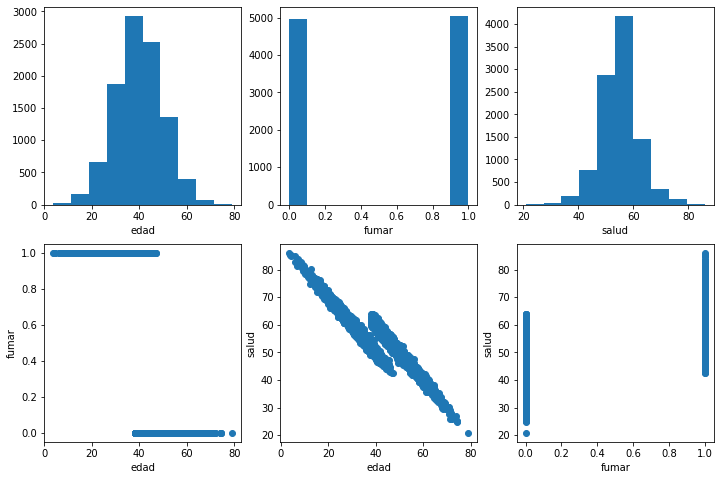

In [ ]:
fig , axes = plt.subplots(2,3)
fig.set_size_inches([12,8])

axes[0,0].hist(edad); axes[0,1].hist(fumar); axes[0,2].hist(salud)
axes[1,0].scatter(edad, fumar); axes[1,1].scatter(edad, salud); axes[1,2].scatter(fumar, salud)

axes[0,0].set_xlabel('edad'); axes[0,1].set_xlabel('fumar'); axes[0,2].set_xlabel('salud')
axes[1,0].set_xlabel('edad'); axes[1,0].set_ylabel('fumar'); axes[1,1].set_xlabel('edad')
axes[1,1].set_ylabel('salud');axes[1,2].set_xlabel('fumar');axes[1,2].set_ylabel('salud')

plt.show()

*Los fumadores suelen ser jóvenes. Los jóvenes tienen mejor salud. Los fumadores tienen mejor salud.*

**3. _Modelo "mal especificado"_. Estimar una regresión lineal sin incluir edad como covariable, es decir:** $$salud_i = \beta_0 + \beta_1  \; fumar_i + u_i$$

  **¿Logran identificar correctamente el efecto causal, es decir, recuperar el verdadero valor de $\beta_1$?** 


In [ ]:
X = data[['fumar']]
y = data['salud']

reg = LinearRegression().fit(X, y)
reg.coef_[0]

**Nuestra respuesta**:

No identificamos bien el efecto causal: $\beta_1$ estimado es 5,5. Pareciera que fumar es bueno para la salud y como conocemos el modelo verdadero, sabemos que no es así.

**Alto acá.** ¿Cómo se explica que el efecto de fumar en la salud parezca positivo?

In [ ]:
print("Lo que sucede es que...")


_Si ud. desea un spoiler, al final de estos ejercicios encontrará la respuesta_.

**3. _Modelo "bien especificado"_. Estimar una regresión lineal incluyendo tanto cigarrillos como edad como covariables. Es decir, el siguiente modelo:** $$salud_i = \beta_0 + \beta_1  \; fumar_i + \beta_2  \; edad_i +  u_i$$
  **¿Logran identificar correctamente el efecto causal, es decir, recuperar el verdadero valor de $\beta_1$ ?**

**Con `sklearn`:**

In [ ]:
X = data[['edad', 'fumar']]
y = data['salud']

reg = LinearRegression().fit(X, y)
reg.coef_[1]

**Con `statsmodels`**:

(en este caso debemos añadir manualmente al modelo el intercepto o parámetro de ordenada al origen)

In [ ]:
X = sm.add_constant(X) 
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  salud   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 2.375e+05
Date:                Sun, 30 Oct 2022   Prob (F-statistic):               0.00
Time:                        02:48:25   Log-Likelihood:                -14117.
No. Observations:               10000   AIC:                         2.824e+04
Df Residuals:                    9997   BIC:                         2.826e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.9800      0.077   1297.190      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**Nuestra respuesta**:

Logramos identificar el verdadero efecto causal: $\beta_1$ estimado es practicamente -0.25

**5. ¡A simular! Generar mil veces las 10000 observaciones, estimar mil veces  $\beta_1$ incluyendo todas las variables, y estimar mil veces $\beta_1$  omitiendo la variable edad. Hacer un boxplot de $\hat{\beta_1}$ cuando no se omite ninguna variable, y un boxplot de $\hat{\beta_1}$ al omitir la variable edad. ¿Qué se observa?**

In [ ]:
b1est_verdadero = [] # acá iremos guardando las estimaciones de b1 con el modelo completo 
b1est_omite = [] # acá iremos guardando las estimaciones de b1 cuando omitimos la variable edad 

for i in range(1000):
  
  # generamos los datos
  edad = np.random.normal(40, 10, size = N)
  cigarrillos = 50 - 0.5 * edad + np.random.exponential(scale = 1, size = N)
  fumar = np.array([1 if i > np.mean(cigarrillos) else 0 for i in cigarrillos])

  salud = 100 - 10 * fumar  - edad + np.random.normal(size = N)


  # DataFrame
  data = pd.DataFrame(np.array([salud, edad, cigarrillos, fumar]).transpose())
  data.columns = ['salud', 'edad', 'cigarrillos', 'fumar']
 

  y = data['salud']
  
  # estimamos con el modelo completo
  X = data[['edad', 'fumar']]
  reg = LinearRegression().fit(X, y)
  b1est_verdadero += [reg.coef_[1]]


  # estimamos omitiendo la variable edad
  X = data[['fumar']]
  reg = LinearRegression().fit(X, y)
  b1est_omite += [reg.coef_[0]]

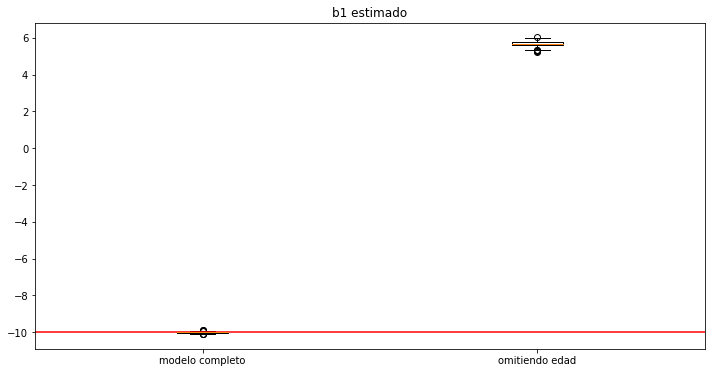

In [ ]:
plt.figure(figsize=(12,6))
plt.boxplot([b1est_verdadero,b1est_omite])
plt.title("b1 estimado")
plt.xticks([1, 2], ['modelo completo', 'omitiendo edad'])
plt.axhline(-10, c='r') # valor verdadero

plt.show()

Vemos que al omitir la variable edad, el estimador de $\beta_1$ está sesgado.

**6. Supongamos que no contamos con la variable edad. Sin embargo, podemos hacer un experimento: distribuir aleatoriamente a un grupo de 10000 personas entre fumadores y no fumadores. Calcular el indicador de salud para esas personas que recibieron tratamiento aleatorio. Graficar la relación entre el tratamiento recibido y la edad.**

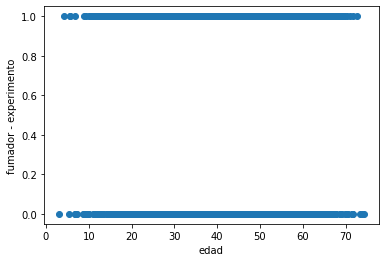

In [ ]:
# Asignamos aleatoriamente quién será fumador y quién no
data["fumar_exp"] = np.round(np.random.binomial(1, 0.5, N))

# Dado el consumo de cigarrillos, calculamos el índice de salud 
data["salud_exp"] = 100 - 10 * data.fumar_exp  - data.edad + np.random.normal(size = N)

# Graficamos
plt.scatter(data.edad, data.fumar_exp)
plt.xlabel("edad")
plt.ylabel("fumador - experimento")
plt.show()

**7. Con los datos generados en el experimento, estime la regresión sin incluir edad como covariable, es decir, el modelo del punto 3. Simule y graficar la distribución del estimador. ¿Es posible identificar el efecto causal, es decir, recuperar el verdadero valor de $\beta_1$?**


In [ ]:
X = data[['fumar_exp']]
y = data['salud_exp']

reg = LinearRegression().fit(X, y)
reg.coef_[0]

_Volvimos a recuperar el efecto causal_. **Alto acá.** ¿Cómo se explica que cuando hacemos un experimento podemos recuperar el efecto causal regresando la salud solamente en la variable fumar?

In [ ]:
print("Lo que sucede es que...")



#### Moralejas de la simulación

* La edad es una variable **confusora**: es relevante para el resultado _y además_ está correlacionada con la variable de tratamiento. Si la omitimos, no podemos identificar correctamente el efecto causal de fumar en la salud. Aparece un **sesgo** y pareciera que fumar se asocia a tener una mayor salud. Se "confunde" el efecto propio de fumar en la salud con el hecho de que los fumadores en general son jóvenes y los jóvenes tienen mejor salud. pero no podemos saber qué parte de la diferencia en la salud promedio de fumadores y no fumadores es efectivamente atribuible al tratamiento (a fumar) y qué parte es atribuible al confusor (a que los fumadores son jóvenes). 


> _Las variables confusoras son aquellas que correlacionan tanto con el tratamiento como con el resultado. Esto hace que los no tratados no sean un buen contrafáctico para los tratados. Porque si los tratados tienen una característica más allá del tratamiento que los diferencia de los no tratados, y esa característica puede influir sobre la variable de resultado, no tenemos forma de distinguir que es el tratamiento y no esta otra variable la causa de los resultados diferentes que observemos. Si no controlamos por ella, la confundiremos con el tratamiento._


* Al experimentar, rompemos la relación de fumar con la edad. Los tratados y no tratados pasan a tener edades que en promedio son similares entre sí. Si ninguno fumara, en promedio los tratados y los no tratados tendrían la misma salud: el resultado potencial de no recibir tratamiento (de no fumar) es el mismo, se cumple el supuesto de independencia. 

* Controlar por la edad permite separar los efectos parciales de fumar y de la edad en la salud. Le "quita" a la variable $fumar$ la parte que afecta a la salud a través de la edad. O, lo que es lo mismo, permite comparar fumadores versus no fumadores entre grupos de la misma edad. Condicional en la edad, el resultado potencial de recibir tratamiento (de no fumar) es el mismo, se cumple el supuesto de independencia. 

# Identificar versus estimar

Es importante distinguir entre algunos conceptos:

- **Estimando y estimador**. El _estimando_ es la cantidad que queremos estimar, que en casos paramétricos suele ser alguno de los parámetros poblacionales (por ejemplo $\beta_1$). En cambio, el _estimador_ es una función de los datos (es decir un _estadístico_) que nos permite aproximarnos al valor real (por ejemplo $\hat{\beta}_1$, el valor calculado por cuadrados mínimos, estima $\beta_1$).

Hay dos tipos de estimandos:
- **Estimando causal**: es un estimando que involucra contrafácticos y por lo tanto no es inmediatamente calculable (involucra "datos faltantes" imposibles de medir). El que venimos viendo fundamentalmente es el ATE, $\E[Y(1)] - \E[Y(0)]$
- **Estimando estadístico**: es un estimando que no involucra contrafácticos y por lo tanto puede ser calculado a partir de los datos sobre lo que realmente ocurrió (independientemente de si tenemos acceso o no a esos datos).

Y esto es fundamental para distinguir claramente dos etapas del análisis causal:

- **Identificación** es el proceso de utilizar hipótesis causales para transformar un estimando causal en un estimando estadístico equivalente.
- **Estimación**: es el proceso de elegir y calcular un estimador para nuestro estimando elegido previamente.

En nuestra simulación, al omitir la variable edad, la _estimación_ de $\beta_1$ sí capta correctamente la **correlación** entre tratamiento y resultado: en efecto, ¡los fumadores suelen tener mejor salud! Pero que no sería correcto darle a esa correlación una interpretación causal. Hay una parte de esa correlación que es espuria: se debe al hecho de que son los jóvenes los que fuman más, y a su vez los jóvenes tienen mejor salud. Confundimos el efecto de la edad en la salud con el efecto parcial que nos interesa realmente, el de fumar en sí. El error no está en la etapa de estimación per se, sino en la etapa de identificación: el _estimando_, aquello que nuestro método estadístico estima, no tiene una interretación causal, y por lo tanto tampoco la tiene nuestro estimador.

Así, podemos entender el proceso de análisis causal descrito hasta ahora como el siguiente _pipeline_ (cadena de procesos a ser realizados uno detrás del otro):

$$ {\sf Modelar} \to {\sf Identificar} \to {\sf Estimar} $$

# Causalidad, predecibilidad y explicabilidad

A medida que vayamos avanzando en el curso, la idea es que quede cada vez más claro por qué las siguientes herramientas de análisis **no hacen análisis causal** por más que muchas veces se diga que lo hacen.

- _Shap values_. Los valores SHAP (SHapley Additive exPlanations) son un método muy interesante para identificar qué aspectos del input de un modelo son los más informativos a la hora de explicar el resultado de predicción del mismo. Sin embargo esto no tiene mucho que ver con qué pasaría si alguna variable fuera intervenida a través de alguna decisión o cambio en el mundo real que genera los datos que sirven de input al modelo. Ver [aquí](https://shap.readthedocs.io/en/latest/example_notebooks/overviews/Be%20careful%20when%20interpreting%20predictive%20models%20in%20search%20of%20causal%C2%A0insights.html).
  - Esto es un buen ejemplo de cómo _causalidad y explicabilidad son cosas diferentes_.
<center><img src="imgs/shap.png" height="150" style="margin:auto"/></center>

  
- Análisis factorial y métodos como PCA (Principal Component Analysis): a grandes rasgos pasa lo mismo que con SHAP: se trata de encontrar combinaciones de las variables ("factores" o "componentes principales") que explican la variabilidad observada. Más allá de que potencialmente haya alguna hipótesis causal sobre la relación entre estos factores y las variables observadas, podemos decir que estos métodos no utilizan ideas de análisis causal tal como ha sido presentado aquí.
- Causalidad de Granger. En este caso se trata de determinar mediante un test estadístico si una serie de tiempo X (vista hasta tiempo $t$) puede ser utilizada para predecir el valor que _otra_ serie de tiempo Y adopta en el instante $t+1$. Por más que tenga "causalidad" en el nombre, hasta el mismo Granger admitió que no es tanto una medida de causalidad sino una medida de hasta qué punto X _pronostica_ a Y.

<center><img src="imgs/granger.png" height="150" style="margin:auto"/></center>

En el fondo, lo que ocurre métodos como estos permiten entender mejor la naturaleza de las **correlaciones** presentes en los datos (y cómo se relacionan con las predicciones de nuestros modelos), pero nunca abordan directamente la causalidad **porque nunca se meten con el razonamiento contrafáctico**. Así que recuerden:

- ¡Sin contrafácticos no hay causalidad!
- ¡Sin hipótesis causales, no hay conclusiones causales!

# Conclusiones

En esta primera clase... 

* Dimos un pantallazo de por qué podría interesarnos la causalidad.
* Diferenciamos correlación de causalidad.
* Vimos qué significa entender una afirmación causal como comparación de mundos contrafácticos.
* Presentamos el marco de resultados potenciales o _potential outcomes_.
* Nos encontramos con el problema fundamental de la inferencia causal.
* Vimos qué es un confusor y los problemas que generan a la hora de identificar el efecto causal.
* Vimos los supuestos que deben cumplirse para poder aproximar el efecto causal.
* Distinguimos entre _identificación_ y _estimación_.
* Vimos un ejemplo numérico para ayudar a cimentar estas ideas.

Algunas cosas importantes a llevarse:

* Un buen primer paso a la hora de querer encontrar una relación causal es preguntarse ¿cuál es mi experimento ideal? (con DeLorean y sin DeLorean)
* Hay dos tipos de escenarios: los datos experimentales, en los que intervenimos sobre el valor de la variable $T$ (asignación de tratamiento) y la determinamos exógenamente, y los datos observacionales, en los cuales debemos tener en cuenta la presencia de posibles confusores.
* Para poder identificar el efecto causal, en ambos casos necesitamos hipótesis causales, ya sea para afirmar que nuestro experimento fue bien diseñado, o para afirmar que el conjunto de covariables que controlamos en nuestro análisis es suficiente (y por ejemplo, no se nos escapó ningún confusor).

En lo que sigue del curso veremos qué podemos hacer cuando contamos con información más limitada o no podemos experimentar: cómo poder construir un contrafáctico _creíble_, un grupo de control comparable al del tratamiento.

## Referencias

### Para repasar
- **Angrist & Pischke (2015), Dominar la econometría**. Capítulo 1 - Experimentos aleatorios.
- **Neal (2020), [Introduction to causal inference](https://www.bradyneal.com/Introduction_to_Causal_Inference-Dec17_2020-Neal.pdf)**. Capítulos 1 y 2 (en inglés)

### Para profundizar
- Causalidad y filosofía
  - Stanford Encyclopedia of Philosophy, [Counterfactual theories of causation](https://plato.stanford.edu/entries/causation-counterfactual/)
- Causalidad y econometría
  - El [artículo de prensa del premio Nobel de economía de 2021](https://www.nobelprize.org/prizes/economic-sciences/2021/press-release/) y los artículos que allí se citan (en inglés)
  - Imbens (2019), [Potential Outcome and Directed Acyclic Graph Approaches to Causality: Relevance for Empirical Practice in Economics](https://arxiv.org/abs/1907.07271)
  - Este video titulado [Machine Learning and Causal Inference for Policy Evaluation](https://www.youtube.com/watch?v=Yx6qXM_rfKQ) y este otro video titulado [Machine Learning and Causal Inference](https://www.youtube.com/watch?v=DixuYCsXFig&t=214s) de Susan Athey (en inglés)
  - Este video titulado [Econometrics is the original data science](https://www.youtube.com/watch?v=T24j8XTcpe0) de Joshua Angrist (en inglés)
- Causalidad e inteligencia artificial
  - Schölkopf et al (2021) [Towards Causal Representation Learning](https://arxiv.org/abs/2102.11107)
  - Zhao, Hastie (2021) [Causal interpretations of black-box models](https://www.tandfonline.com/doi/pdf/10.1080/07350015.2019.1624293)
